### Open Air Test Objective
The results from this test will inform propeller selection for the rest of our testing. While we expect duct aerodynamics to change relative propeller performance, this test will ensure we are capable of producing enough thrust for our application (hovering flight with a payload).

Props that produce significantly less thrust than required to lift a payload (~12 N) will be eliminated and a propeller with high power efficiency around the 12 N range will be selected, with slight preference toward high efficiency in the 8 N range (flight without payload) and high full throttle thrust.

This test will also validate full throttle performance of our new motors as their lower KV rating will result in a reduced maximum test rpm. We must ensure that they spin our propellers fast enough to produce the thrust required for flight with a payload.

### Procedure
- Initiate sweep from 0-100% throttle in increments of 5%, holding each throttle for 2 seconds.
- At each throttle step, allow ~0.5s for transient behaviour to settle and then average over the remaining data (~250 samples) to produce a single DC measurement for thrust, power, rpm, etc. at each point in the sweep.
- Repeat experiment at least once for each aerodynamic configuration, disassembling and reassembling between tests to ensure repeatability.

### Open Air Test Configurations
| Propeller Type    | Propeller Diameter    | Propeller Pitch  | Propeller Tip Profile | Test Status |
|-                  |-                      |-                 |-                      |-            |
| HQ Prop 6-blade   | 5 in / 127 mm         |  4               | Unshaved              | In Progress |
| HQ Prop 3-blade   | 5 in / 127 mm         |  4               | Unshaved              | In Progress |
| Toroidal 2-blade  | 5.1 in / 129.54 mm    |  4.5             | Unshaved              | In Progress |
| White 3-blade     | 7 in / 177.8 mm       |  3.5             | Unshaved              | In Progress |
| HQ Prop 4-blade   | 6 in / 152.4 mm       |  3.8             | Unshaved              | In Progress |
| HQ Prop 6-blade   | TBD                   |  4               | Shaved                | Blocked     |

### Hypothesis
- For propellers of the same diameter, we expect configurations with higher blade count and higher pitch to produce greater thrust. We expect low pitch, low blade count propellers to produce less thrust, but have higher thrust-power efficiency. 
- As propeller diameter is increased, both thrust and thrust-power efficiency are expected to improve.

### Analysis
Average battery voltage, motor currents, and thrust will be collected for each throttle step after the transients stabilize, and a thrust vs. electrical power plot will be made to compare all props.

### Observations

For our first few full throttle tests, we noticed our thrust start to decrease as throttle went above about 75%, the root cause of this was determined to be the movable carriage hitting the end stops, which were taking up some of the load since the jig was remounted to a new base and the relative positioning of components changed since the last test.

In [3]:
from runner import test_run, TestPlan, TestStep
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import uncertainties as unc

### Specify Test Plan
Initialize a test plan object which sweeps from 0 to 100% throttle in increments of 5%, holding at each step for 2 seconds

In [4]:
# 1. Create a test plan consisting of steps.
step_duration_ms = 2_000
step_range = np.arange(5, 101, 5)

steps = [
    TestStep(bottom_throttle=i, top_throttle=i, duration_ms=step_duration_ms)
    for i in step_range
]
plan = TestPlan("test", steps=steps)

plan

TestPlan(name='test', steps=[TestStep(duration_ms=2000, top_throttle=5, bottom_throttle=5, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=10, bottom_throttle=10, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=15, bottom_throttle=15, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=20, bottom_throttle=20, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=25, bottom_throttle=25, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=30, bottom_throttle=30, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=35, bottom_throttle=35, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=40, bottom_throttle=40, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=45, bottom_throttle=45, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=50, bottom_throttle=50, pitch_ang

In [5]:
# Initialize short thrust test to validate propeller mounting direction after changing props
test_duration_ms = 2000
mount_test_throttle = 10
perform_mounting_test = True

mount_test_plan = TestPlan("test", steps=[TestStep(bottom_throttle=mount_test_throttle, top_throttle=mount_test_throttle, duration_ms=test_duration_ms)])

### Execute Tests

In [6]:
test_directory = Path("../test_data/open_air/")

In [7]:
### Execute optional mounting test
if (perform_mounting_test):
    try:
        test_run(filename=None, plan=mount_test_plan)
    except Exception as e:
        print(e)

could not open port 'COM9': FileNotFoundError(2, 'The system cannot find the file specified.', None, 2)


In [8]:
data_dict = {}

### 5 INCH 6 BLADE TEST RUNS
data_dict["test_5in_6blade"] = test_run(
    filename=test_directory / "test_5in_6blade.csv", plan=plan
)
data_dict["test_5in_6blade_rerun"] = test_run(
    filename=test_directory / "test_5in_6blade_rerun.csv", plan=plan
)
data_dict["test_5in_6blade_rerun_0"] = test_run(
    filename=test_directory / "test_5in_6blade_rerun_0.csv", plan=plan
)
data_dict["test_5in_6blade_rerun_1"] = test_run(
    filename=test_directory / "test_5in_6blade_rerun_1.csv", plan=plan
)
data_dict["test_5in_6blade_rerun_2"] = test_run(
    filename=test_directory / "test_5in_6blade_rerun_2.csv", plan=plan
)
data_dict["test_5in_6blade_ducted"] = test_run(
    filename=test_directory / "test_5in_6blade_1500um.csv", plan=plan
)

### 5 INCH 3 BLADE TEST RUNS
# data_dict["test_5in_3blade"] = test_run(
#     filename=test_directory / "test_5in_3blade.csv", plan=plan
# )
# data_dict["test_5in_3blade_rerun"] = test_run(
#     filename=test_directory / "test_5in_3blade_rerun.csv", plan=plan
# )
# data_dict["test_5in_3blade_rerun_0"] = test_run(
#     filename=test_directory / "test_5in_3blade_rerun_0.csv", plan=plan
# )

# ### 5 INCH TOROIDAL TEST RUNS
# data_dict["test_5in_toroidal"] = test_run(
#     filename=test_directory / "test_5in_toroidal.csv", plan=plan
# )
# data_dict["test_5in_toroidal_rerun"] = test_run(
#     filename=test_directory / "test_5in_toroidal_rerun.csv", plan=plan
# )

### MISC PROPELLER TESTING
#
# data_dict["test_5in_4blade_blue"] = test_run(
#     filename=test_directory / "test_5in_4blade_blue.csv", plan=plan
# )
# data_dict["test_6in_4blade"] = test_run(
#     filename=test_directory / "test_6in_4blade.csv", plan=plan
# )
# data_dict["test_7in_3blade"] = test_run(
#     filename=test_directory / "test_7in_3blade.csv", plan=plan
# )

Loading saved data
Loading saved data
Loading saved data
Loading saved data
Loading saved data
Loading saved data


### Data Analysis

In [9]:
# Aggregate test data
df_all = pd.concat(data_dict, names=["test_name"])
df_all

top_motor_rpm  bottom_motor_rpm  \
test_name              time_ms                                      
test_5in_6blade        0.446                0.0               0.0   
                       5.174                0.0               0.0   
                       8.154                0.0               0.0   
                       11.162               0.0               0.0   
                       14.154               0.0               0.0   
...                                         ...               ...   
test_5in_6blade_ducted 41769.163         3942.0            4000.0   
                       41772.160         3942.0            3971.0   
                       41775.163         3800.0            3942.0   
                       41779.159         3800.0            3885.0   
                       41782.163         3771.0            3857.0   

                                  batt_voltage_V  batt_current_A  \
test_name              time_ms                                     
test_5in_6blade        0.446           18.018000           10.24   
                       5.174           17.240999           10.24   
                       8.154           17.052000           10.24   
                       11.162          16.926001           10.24   
                       14.154          16.841999           10.24   
...                                          ...             ...   
test_5in_6blade_ducted 41769.163       16.023001           10.24   
                       41772.160       16.023001           10.24   
                       41775.163       16.023001           10.24   
                       41779.159       16.023001           10.24   
                       41782.163       16.023001           10.24   

                                  top_current_A  bottom_current_A  thrust_N  \
test_name              time_ms                                                
test_5in_6blade        0.446            0.08724          -0.36166 -0.130701   
                       5.174            0.14540          -0.29211 -0.130701   
                       8.154            0.08724          -0.25038 -0.130701   
                       11.162           0.10178          -0.22256 -0.130701   
                       14.154           0.15994          -0.20865 -0.130701   
...                                         ...               ...       ...   
test_5in_6blade_ducted 41769.163        0.05816          -0.23647  2.641215   
                       41772.160       -0.10178          -0.29211  2.641215   
                       41775.163       -0.33442          -0.16692  2.641215   
                       41779.159        0.14540          -0.12519  2.641215   
                       41782.163        0.14540           0.04173  2.641215   

                                  torque_N  
test_name              time_ms              
test_5in_6blade        0.446     -0.000675  
                       5.174     -0.000675  
                       8.154     -0.000675  
                       11.162    -0.000675  
                       14.154    -0.000675  
...                                    ...  
test_5in_6blade_ducted 41769.163  0.011393  
                       41772.160  0.011393  
                       41775.163  0.007076  
                       41779.159  0.007076  
                       41782.163  0.007076  

[82516 rows x 8 columns]

In [10]:
# Select single test to analyze closer
test_data = df_all.loc["test_5in_6blade"]
test_data

,top_motor_rpm,bottom_motor_rpm,batt_voltage_V,batt_current_A,top_current_A,bottom_current_A,thrust_N,torque_N
time_ms,,,,,,,,
0.446,0.0,0.0,18.018000,10.24,0.08724,-0.36166,-0.130701,-0.000675
5.174,0.0,0.0,17.240999,10.24,0.14540,-0.29211,-0.130701,-0.000675
8.154,0.0,0.0,17.052000,10.24,0.08724,-0.25038,-0.130701,-0.000675
11.162,0.0,0.0,16.926001,10.24,0.10178,-0.22256,-0.130701,-0.000675
14.154,0.0,0.0,16.841999,10.24,0.15994,-0.20865,-0.130701,-0.000675
...,...,...,...,...,...,...,...,...
41969.158,1528.0,1471.0,15.834000,10.24,0.08724,-0.12519,1.714019,0.007230
41972.154,1528.0,1485.0,15.834000,10.24,-0.00000,-0.29211,1.714019,0.007230
41975.158,1457.0,1400.0,15.813000,10.24,0.05816,-0.11128,1.714019,0.007230


In [11]:
# Extract raw data from a loaded test csv
top_current_raw = test_data["top_current_A"]
bottom_current_raw = test_data["bottom_current_A"]
hall_current_raw = top_current_raw + bottom_current_raw

shunt_current_raw = test_data["batt_current_A"]
batt_voltage = test_data["batt_voltage_V"]

top_rpm = test_data["top_motor_rpm"]
bottom_rpm = test_data["bottom_motor_rpm"]

thrust_N = test_data["thrust_N"]
time_ms = test_data.index

# Determine mean sample rate
sample_rate_ms = np.mean(np.diff(time_ms))

In [12]:
# Generate buckets for averaging based on step duration defined in testing
stable_step_duration_ms = step_duration_ms / 2
transient_offset_ms = (
    500  # Ignore first 500 ms of each throttle step to allow transients to settle
)
step_start_times = np.arange(len(step_range)) * step_duration_ms


# Aggregate data for each throttle step
df_steps = (
    pd.concat(
        [
            df_all.loc[
                (
                    slice(None),
                    slice(
                        t_start + transient_offset_ms,
                        t_start + transient_offset_ms + stable_step_duration_ms,
                    ),
                ),
                :,
            ]
            for t_start in step_start_times
        ],
        keys=step_range,
        names=["throttle"],
    )
    .groupby(["test_name", "throttle"])
    .agg(["mean", "std"])
)

df_steps

top_motor_rpm             bottom_motor_rpm  \
                                          mean         std             mean   
test_name               throttle                                              
test_5in_6blade         5          1736.214724   12.066351      1729.757669   
                        10         3096.911043   24.990609      3081.901840   
                        15         4341.507692   39.063783      4300.356923   
                        20         5547.429448   72.276731      5488.297546   
                        25         6666.871560   52.143520      6589.758410   
...                                        ...         ...              ...   
test_5in_6blade_rerun_2 80        15612.533537  121.518472     15352.048780   
                        85        16158.945455  117.313222     15857.266667   
                        90        16571.966463  108.840689     16488.533537   
                        95        16996.733945  103.562522     16878.385321   
                        100       17376.574924   81.706941     17294.889908   

                                             batt_voltage_V            \
                                         std           mean       std   
test_name               throttle                                        
test_5in_6blade         5          30.122103      16.786922  0.025323   
                        10         27.424574      16.764699  0.025912   
                        15         46.208618      16.739132  0.023497   
                        20         66.349752      16.696095  0.024659   
                        25         47.891042      16.633092  0.026114   
...                                      ...            ...       ...   
test_5in_6blade_rerun_2 80        110.118552      14.867040  0.029932   
                        85        108.854530      14.575591  0.029858   
                        90        100.899042      14.317966  0.035961   
                        95         85.793472      14.048679  0.028748   
                        100        81.010944      13.770734  0.020327   

                                 batt_current_A           top_current_A  \
                                           mean       std          mean   
test_name               throttle                                          
test_5in_6blade         5             10.240000  0.000000      0.255922   
                        10            10.240000  0.000000      0.413097   
                        15            10.240000  0.000000      0.612648   
                        20            10.240000  0.000000      0.971192   
                        25            10.240000  0.000000      1.397174   
...                                         ...       ...           ...   
test_5in_6blade_rerun_2 80            41.674878  1.501635     19.025368   
                        85            47.287758  1.657290     21.601021   
                        90            52.390976  1.398553     24.223596   
                        95            57.664098  1.384096     27.363613   
                        100           62.435230  1.051849     30.089485   

                                           bottom_current_A            \
                                       std             mean       std   
test_name               throttle                                        
test_5in_6blade         5         0.129076        -0.140551  0.115760   
                        10        0.256177         0.001024  0.237140   
                        15        0.418310         0.176764  0.399756   
                        20        0.756865         0.368658  0.681689   
                        25        1.078249         0.638414  1.016856   
...                                    ...              ...       ...   
test_5in_6blade_rerun_2 80        3.304293        16.366896  3.076448   
                        85        3.062861        18.846533  3.053416   
                        90        3.109566       

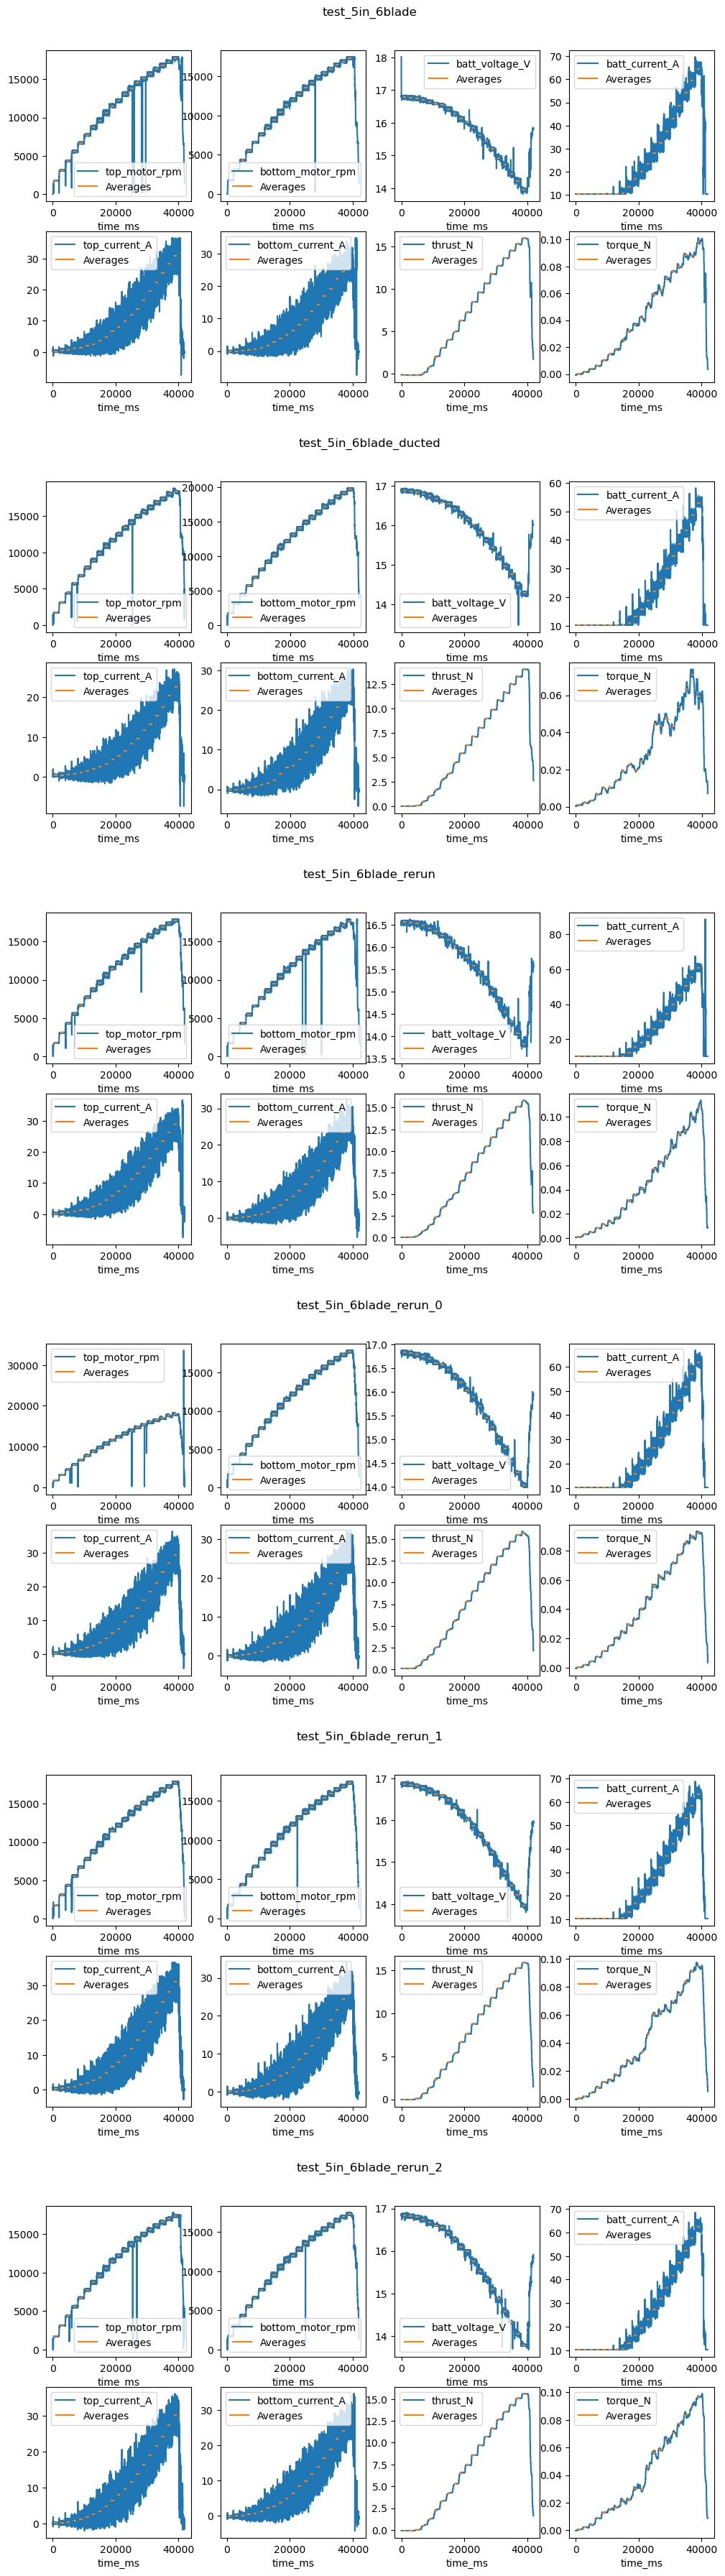

In [13]:
# Debug plots
fig = plt.figure(figsize=(12, 6*len(data_dict)))
subfigs = fig.subfigures(len(data_dict), 1)
if not isinstance(subfigs, np.ndarray):
    subfigs = np.array([subfigs])
for subfig, (n, grp) in zip(subfigs, df_all.groupby("test_name")):
    axs = subfig.subplots(2, 4)
    for ax, col in zip(axs.flat, grp):
        grp.reset_index("test_name").plot(ax=ax, y=col)
        ax.hlines(
            df_steps[col].loc[n]["mean"],
            step_start_times + transient_offset_ms,
            step_start_times + transient_offset_ms + stable_step_duration_ms,
            colors="C1",
            label="Averages",
        )
        ax.legend()
    subfig.suptitle(n)

### Data Analysis - Defining Uncertainty
#### Current Measurement Uncertainty
In `hall_sensor_calibration_dc.ipynb` we derived a linear curve fit which converts Hall sensor output voltage to current in Amperes. The uncertainty in our gain and offset parameters is a linear function of the measured current output in Amps:

$$\sigma_{I_{bat}} = 0.02294 \;I_{bat} + 0.03734$$

#### Voltage Measurement 
For an input with nominal 4S LiPo voltage (14.8 V) we observe 25 mV of noise in our measurement signal. We use this observation to set a constant relative uncertainty of:

$$\frac{\sigma_{V}}{V} = \frac{0.025}{14.8}$$

#### Thrust Measurement Uncertainty
The TAL220 load cell datasheet specifies a maximum combined error of $0.05$% full-scale. For our 10kg load cell, this means that:
$$\sigma_T = 0.05\% \times 10 kg$$

In [14]:
thrust_mean_g = df_steps["thrust_N"]["mean"] / 9.81 * 1e3
thrust_g_err = 5

hover_thrust_g = 750
payload_thrust_g = 1200

hall_current_mean = df_steps["top_current_A"]["mean"] + df_steps["bottom_current_A"]["mean"]
hall_current_rel_err = (0.02294 * hall_current_mean + 0.3734) / hall_current_mean

batt_voltage_mean = df_steps["batt_voltage_V"]["mean"]
batt_voltage_rel_err = 0.025 / 14.8

shunt_current_mean = df_steps["batt_current_A"]["mean"]
shunt_power_mean = shunt_current_mean * batt_voltage_mean

batt_power_mean = hall_current_mean * batt_voltage_mean
batt_power_rel_err = np.sqrt(hall_current_rel_err**2 + batt_voltage_rel_err**2)

thrust_power_rel_err = np.sqrt((thrust_g_err / thrust_mean_g)**2 + batt_power_rel_err**2)
thrust_mean_g = thrust_mean_g * (thrust_mean_g > 0)

df_thrust_power = pd.DataFrame(
    {
        "thrust_mean_g": thrust_mean_g,
        "batt_power_mean": batt_power_mean,
        "shunt_power_mean": shunt_power_mean,
        "thrust_power_g_W": thrust_mean_g / batt_power_mean,
        "shunt_thrust_power_g_W": thrust_mean_g / shunt_power_mean,
        "batt_power_err": batt_power_rel_err * batt_power_mean,
        "thrust_g_err": thrust_g_err,
        "thrust_power_err": thrust_power_rel_err * (thrust_mean_g / batt_power_mean)
    }
)

batt_power_rel_err

test_name                throttle
test_5in_6blade          5           3.259453
                         10          0.924611
                         15          0.495953
                         20          0.301633
                         25          0.206383
                                       ...   
test_5in_6blade_rerun_2  80          0.033533
                         85          0.032216
                         90          0.031075
                         95          0.030238
                         100         0.029565
Name: mean, Length: 120, dtype: float64

In [1]:
plt.figure(figsize=(16, 6))
for n, grp in df_thrust_power.groupby("test_name"):
    plt.errorbar(x=grp.index.get_level_values("throttle"), y="thrust_mean_g", yerr="thrust_g_err", data=grp, label=n, fmt='o', capsize=3, markersize=3)
plt.xlabel("Throttle (%)")
plt.ylabel("Thrust (gf)")
plt.axhline(hover_thrust_g, color="r", label="Nominal Drone Weight")
plt.axhline(payload_thrust_g, color="m", label="Drone Weight w/ Payload")
plt.legend()
plt.grid()
plt.show()

NameError: name 'plt' is not defined

In [ ]:
# TODO: nominal thrust-weight ratio plot
# thrust_mean_g.iloc[-1] / hover_thrust_g

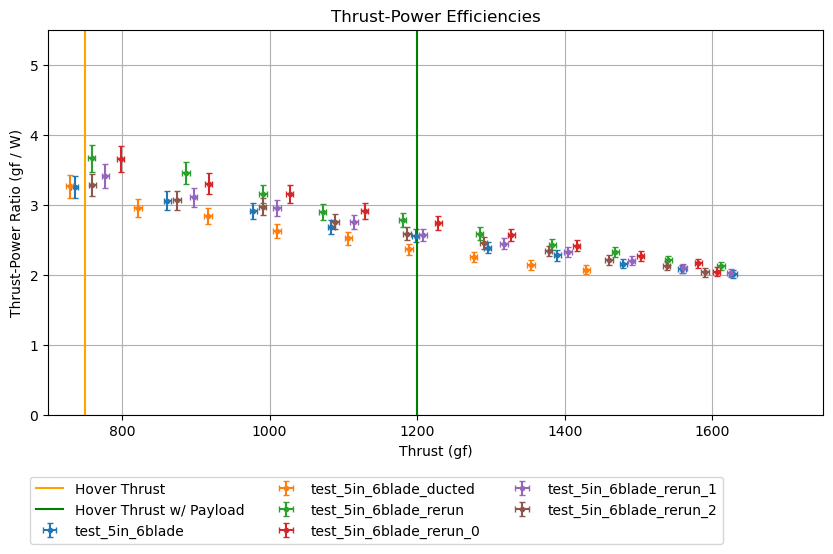

In [ ]:
fig = plt.figure(figsize=(10, 5))
for n, grp in df_thrust_power.groupby("test_name"):
    plt.errorbar(x="thrust_mean_g", y="thrust_power_g_W", xerr="thrust_g_err", yerr="thrust_power_err", data=grp, label=n, fmt='o', markersize=3, capsize=2)
plt.xlabel("Thrust (gf)")
plt.ylabel("Thrust-Power Ratio (gf / W)")
plt.xlim(700, 1750)
plt.ylim(0,5.5)
plt.axvline(hover_thrust_g, color="orange", label="Hover Thrust")
plt.axvline(payload_thrust_g, color="g", label="Hover Thrust w/ Payload")
plt.grid()
plt.legend(ncols=3, bbox_transform=fig.transFigure, bbox_to_anchor=(0.1, 0), loc="upper left")
plt.title("Thrust-Power Efficiencies")
plt.show()

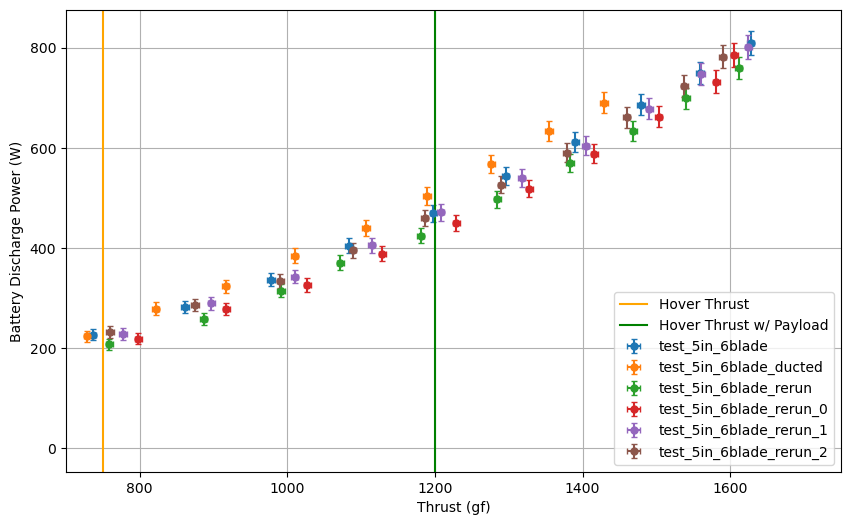

In [ ]:
plt.figure(figsize=(10, 6))
for n, grp in df_thrust_power.groupby("test_name"):
    #plt.scatter(x="thrust_mean_g", y="batt_power_mean", data=grp, label=n, s=20)
    plt.errorbar(x="thrust_mean_g", y="batt_power_mean", xerr="thrust_g_err", yerr="batt_power_err", label=n, data=grp, fmt='o', capsize=2, markersize=5)
plt.xlabel("Thrust (gf)")
plt.ylabel("Battery Discharge Power (W)")
plt.xlim(700, 1750)
plt.grid()
plt.axvline(hover_thrust_g, color="orange", label="Hover Thrust")
plt.axvline(payload_thrust_g, color="g", label="Hover Thrust w/ Payload")
plt.legend()
plt.show()

In [ ]:
characteristic_thrust = pd.Index(
    [hover_thrust_g, payload_thrust_g], name="thrust_mean_g"
)
# Interpolate power at hover and payload thrust
df_power_interp = (
    df_thrust_power.reset_index("throttle")
    .set_index("thrust_mean_g", append=True)
    .groupby("test_name")
    .apply(
        lambda g: (gd := g.droplevel("test_name").dropna())[
            ~gd.index.duplicated(keep="first")
        ]
        .reindex(gd.index.append(characteristic_thrust).unique())
        .sort_index()
        .interpolate(method="index", limit_area="inside")
        .loc[characteristic_thrust]
    )
)
df_power_interp

throttle  batt_power_mean  \
test_name               thrust_mean_g                               
test_5in_6blade         750.0          55.555152       232.594791   
                        1200.0         75.104333       470.201963   
test_5in_6blade_ducted  750.0          61.124838       235.883249   
                        1200.0         85.627166       511.496011   
test_5in_6blade_rerun   750.0          54.559476       204.114709   
                        1200.0         75.938732       438.087792   
test_5in_6blade_rerun_0 750.0          52.754020       199.748557   
                        1200.0         73.560964       431.485662   
test_5in_6blade_rerun_1 750.0          53.601290       216.193357   
                        1200.0         74.592033       465.623134   
test_5in_6blade_rerun_2 750.0          54.473566       226.573058   
                        1200.0         75.665383       468.052347   

                                       shunt_power_mean  thrust_power_g_W  \
test_name               thrust_mean_g                                       
test_5in_6blade         750.0                324.368598          3.229140   
                        1200.0               571.213074          2.552638   
test_5in_6blade_ducted  750.0                310.994437          3.192340   
                        1200.0               585.819271          2.347574   
test_5in_6blade_rerun   750.0                282.959067          3.676573   
                        1200.0               532.672201          2.744060   
test_5in_6blade_rerun_0 750.0                279.008699          3.768446   
                        1200.0               522.647072          2.785969   
test_5in_6blade_rerun_1 750.0                301.784954          3.478023   
                        1200.0               556.166551          2.579150   
test_5in_6blade_rerun_2 750.0                306.737510          3.316882   
                        1200.0               561.073960          2.565991   

                                       shunt_thrust_power_g_W  batt_power_err  \
test_name               thrust_mean_g                                           
test_5in_6blade         750.0                        2.311931       11.314839   
                        1200.0                       2.101010       16.474941   
test_5in_6blade_ducted  750.0                        2.414258       11.380968   
                        1200.0                       2.049164       17.331465   
test_5in_6blade_rerun   750.0                        2.650963       10.578087   
                        1200.0                       2.254545       15.655276   
test_5in_6blade_rerun_0 750.0                        2.689144       10.602056   
                        1200.0                       2.298835       15.633971   
test_5in_6blade_rerun_1 750.0                        2.486666       10.964374   
                        1200.0                       2.158413       16.388863   
test_5in_6blade_rerun_2 750.0                        2.446506       11.176085   
                        1200.0                       2.139674       16.380061   

                                       thrust_g_err  thrust_power_err  
test_name               thrust_mean_g                                  
test_5in_6blade         750.0                   5.0          0.159081  
                        1200.0                  5.0          0.090091  
test_5in_6blade_ducted  750.0                   5.0          0.156519  
                        1200.0                  5.0          0.080206  
test_5in_6blade_rerun   750.0                   5.0          0.192498  
                        1200.0                  5.0          0.098930  
test_5in_6blade_rerun_0 750.0                   5.0          0.203398  
                        1200.0                  5.0          0.101860  
test_5in_6blade_rerun_1 750.0                   5.0          0.179022  
                        1200.0                  5.0          0.0915

In [ ]:
battery_capacity_Wh = 2 * 0.850 * 14.8
flight_time = pd.to_timedelta(
    battery_capacity_Wh / df_power_interp["batt_power_mean"], unit="h"
).rename("flight_time")
flight_time

test_name                thrust_mean_g
test_5in_6blade          750.0           0 days 00:06:29.415427056
                         1200.0          0 days 00:03:12.632117835
test_5in_6blade_ducted   750.0           0 days 00:06:23.986570536
                         1200.0          0 days 00:02:57.080559768
test_5in_6blade_rerun    750.0           0 days 00:07:23.750479927
                         1200.0          0 days 00:03:26.753079258
test_5in_6blade_rerun_0  750.0           0 days 00:07:33.450083921
                         1200.0          0 days 00:03:29.916592797
test_5in_6blade_rerun_1  750.0           0 days 00:06:58.958294342
                         1200.0          0 days 00:03:14.526417276
test_5in_6blade_rerun_2  750.0           0 days 00:06:39.765094682
                         1200.0          0 days 00:03:13.516816057
Name: flight_time, dtype: timedelta64[ns]

<Axes: title={'center': 'Flight time with a 4S 1700mAh battery pack'}, xlabel='Thrust (gf)', ylabel='Flight time (minutes)'>

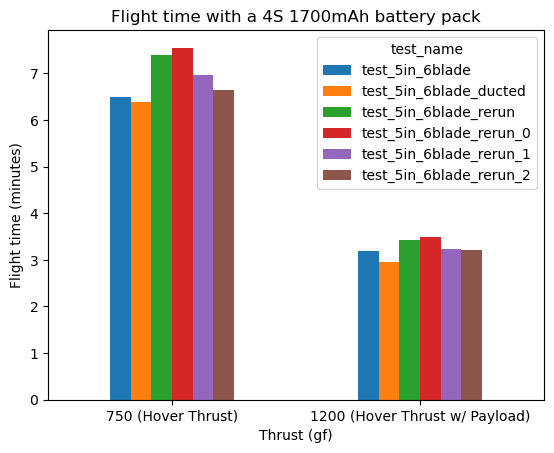

In [ ]:
(
    flight_time.dt.seconds.unstack("test_name").rename(
        index={
            hover_thrust_g: f"{hover_thrust_g} (Hover Thrust)",
            payload_thrust_g: f"{payload_thrust_g} (Hover Thrust w/ Payload)",
        }
    )
    / 60
).plot.bar(
    title="Flight time with a 4S 1700mAh battery pack",
    xlabel="Thrust (gf)",
    ylabel="Flight time (minutes)",
    rot=0,
)